In [2]:
import json

with open('results.json', 'r', encoding='utf8') as jfile:
    data = json.load(jfile)

In [3]:
from collections import defaultdict
file_dict = defaultdict(list)


for test_number, test_group in enumerate(data, start=1):
    for func_test in test_group:
        funcname = func_test['function']
        file_dict[funcname].append({'test_number': test_number, **func_test})

print(file_dict['entire_file_to_df'])

[{'test_number': 1, 'function': 'entire_file_to_df', 'results': [{'filename': 'data/small/day1/2022_place_canvas_history.parquet', 'filetype': 'parquet', 'func_return': [12278385, 6], 'time_in_seconds': 12.692349418008234}, {'filename': 'data/small/day1/2022_place_canvas_history.orc', 'filetype': 'orc', 'func_return': [12278385, 6], 'time_in_seconds': 11.92931369296275}, {'filename': 'data/small/day1/2022_place_canvas_history.feather', 'filetype': 'feather', 'func_return': [12278385, 6], 'time_in_seconds': 11.665467868035194}, {'filename': 'data/small/day1/2022_place_canvas_history.csv', 'filetype': 'csv', 'func_return': [12278385, 6], 'time_in_seconds': 12.347114906995557}]}, {'test_number': 2, 'function': 'entire_file_to_df', 'results': [{'filename': 'data/small/day1/2022_place_canvas_history.parquet', 'filetype': 'parquet', 'func_return': [12278385, 6], 'time_in_seconds': 10.592697852989659}, {'filename': 'data/small/day1/2022_place_canvas_history.orc', 'filetype': 'orc', 'func_retu

In [4]:
functionnames = [file_test['function'] for file_test in data[0]]

function_list = []
for name in functionnames:
    for iteration in file_dict[name]:
        for result in iteration['results']:
            insert_obj = {
                'func_name': name, 
                'test_number': iteration['test_number'], 
                'filetype': result['filetype'],
                'time_in_seconds': result['time_in_seconds']
            }
            function_list.append(insert_obj)

print(function_list[4])

{'func_name': 'entire_file_to_df', 'test_number': 2, 'filetype': 'parquet', 'time_in_seconds': 10.592697852989659}


In [5]:
#print(function_list)
import pandas as pd
from itertools import product
filetypes = ['parquet', 'orc', 'feather', 'csv']
functionnames = [file_test['function'] for file_test in data[0]]
df = pd.DataFrame(function_list)
mean_time = df.groupby(['filetype', 'func_name']).aggregate({'time_in_seconds': 'mean'})
mean_time.to_csv('testing.csv', index=True)

In [6]:
df = pd.read_csv('testing.csv')
df.head()

,filetype,func_name,time_in_seconds
0,csv,entire_file_to_df,9.397006
1,csv,get_amount_colors_used,9.203412
2,csv,get_amount_participants,13.144333
3,csv,get_number_of_rows,0.740979
4,feather,entire_file_to_df,8.928144


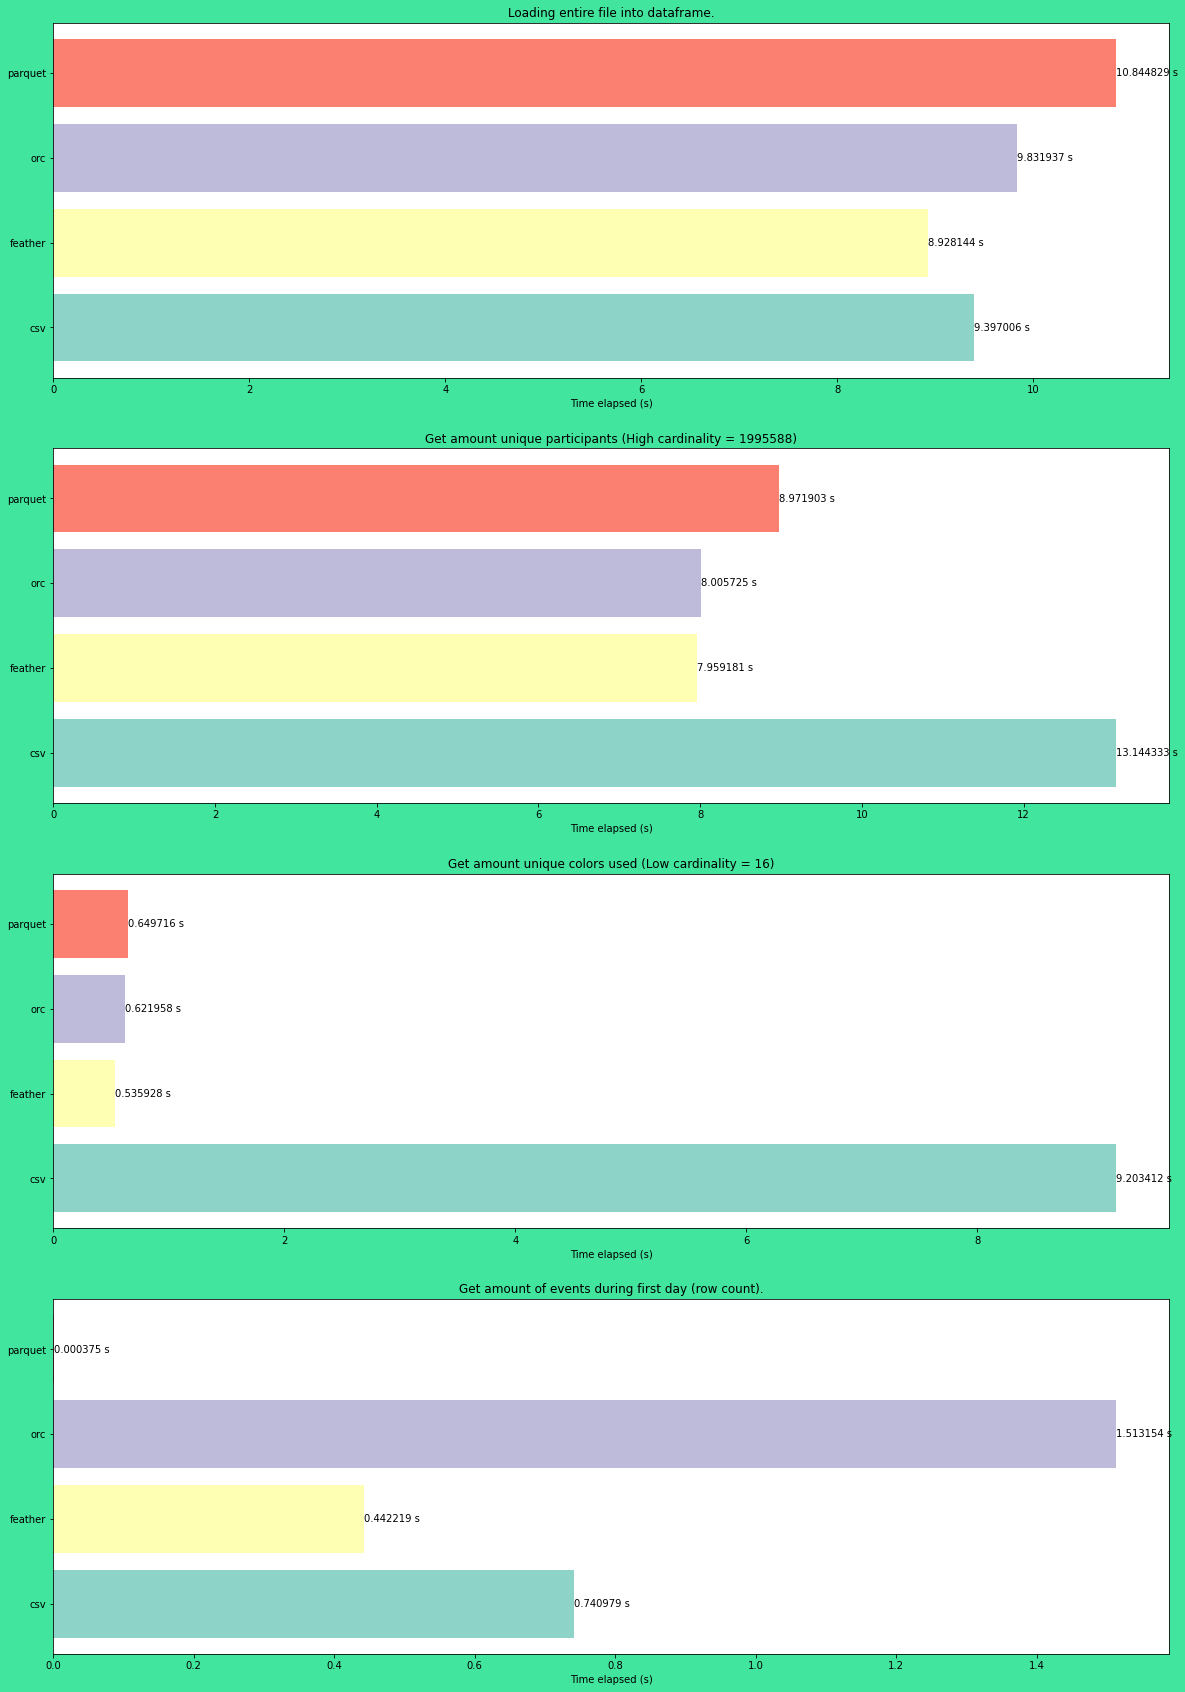

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
# High low cardinality https://www.timescale.com/blog/what-is-high-cardinality-how-do-time-series-databases-influxdb-timescaledb-compare/
fig, axs = plt.subplots(4, figsize=(20, 30), facecolor='#42e59e')
functionnames = [file_test['function'] for file_test in data[0]]
titles = [
    'Loading entire file into dataframe.',
    'Get amount unique participants (High cardinality = 1995588)',
    'Get amount unique colors used (Low cardinality = 16)',
    'Get amount of events during first day (row count).'
]

for i, name in enumerate(functionnames):
    fdf = df[df['func_name'] == name]
    ftypes = fdf.iloc[:, 0]
    fnames = fdf.iloc[:, 1]
    times = fdf.iloc[:, 2]

    y = np.arange(len(ftypes))
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Time elapsed (s)')
    axs[i].set_yticks(y, ftypes)

    bar = axs[i].barh(y, times, color=[cm.get_cmap('Set3')(i) for i, _ in enumerate(ftypes)])
    labels = [f'{n} s' for n in np.round(times, 6)]
    axs[i].bar_label(bar, labels)

fig.savefig('graphs/reading_results.PNG')

